# Librerías

In [ ]:
!pip install tensorflow keras

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout

# conexión a la base de datos Mongo DB

In [ ]:
# Ruta del archivo JSON
ruta_archivo = '/content/D_fixtures_ligaMX.json'

# Leer el archivo JSON y convertirlo en un DataFrame
df = pd.read_json(ruta_archivo)

# Mostrar el DataFrame
print(df)


                           _id             city        coach_away  \
0     66e4e1df8c03f0ca7441c66a             uanl        M. Almeyda   
1     66e4e1df8c03f0ca7441c66b      guadalajara  Ricardo Ferretti   
2     66e4e1df8c03f0ca7441c66c           toluca        M. Almeyda   
3     66e4e1df8c03f0ca7441c66d      guadalajara      R. Cristante   
4     66e4e1df8c03f0ca7441c66e             uanl        M. Herrera   
...                        ...              ...               ...   
2854  66e4e1df8c03f0ca7441d190  toluca de lerdo       desconocido   
2855  66e4e1df8c03f0ca7441d191      mexico city       desconocido   
2856  66e4e1df8c03f0ca7441d192   aguascalientes       desconocido   
2857  66e4e1df8c03f0ca7441d193        guadalupe       desconocido   
2858  66e4e1df8c03f0ca7441d194          tijuana       desconocido   

            coach_home  goals_away  goals_home  id_fixture  lineup_away  \
0     Ricardo Ferretti           2           2      143579      4-2-3-1   
1           M. Almeyd

# Limpieza y transformación de datos

In [ ]:
# Suponiendo que tienes un DataFrame llamado "df"
print(df.isnull().sum())

_id             0
city            0
coach_away      0
coach_home      0
goals_away      0
goals_home      0
id_fixture      0
lineup_away     0
lineup_home     0
referee         0
round           0
season          0
status_short    0
team_away       0
team_home       0
venue           0
winner_away     0
winner_home     0
dtype: int64


In [ ]:
#cambiar NAN por 0
#df = df.fillna(0)

In [ ]:
# Reemplazar 'false' por 0 y 'true' por 1
#df['games_captain'] = df['games_captain'].replace({'false': 0, 'true': 1})

# Convertir el campo a entero
#df['games_captain'] = df['games_captain'].astype(int)

# Ver los valores únicos después de la conversión
#print(df['games_captain'].unique())


[0 1]


In [ ]:
# Codificar variables categóricas en índices
id_fixture= LabelEncoder()
referee = LabelEncoder()
status_short = LabelEncoder()
season = LabelEncoder()
round = LabelEncoder()
venue = LabelEncoder()
city = LabelEncoder()
team_home = LabelEncoder()
team_away = LabelEncoder()
lineup_home = LabelEncoder()
lineup_away = LabelEncoder()
coach_home = LabelEncoder()
coach_away = LabelEncoder()

df['id_fixture'] = id_fixture.fit_transform(df['id_fixture'])
df['referee'] = referee.fit_transform(df['referee'])
df['status_short'] = status_short.fit_transform(df['status_short'])
df['season'] = season.fit_transform(df['season'])
df['round'] = round.fit_transform(df['round'])
df['venue'] = venue.fit_transform(df['venue'])
df['city'] = city.fit_transform(df['city'])
df['team_home'] = team_home.fit_transform(df['team_home'])
df['team_away'] = team_away.fit_transform(df['team_away'])
df['lineup_home'] = lineup_home.fit_transform(df['lineup_home'])
df['lineup_away'] = lineup_away.fit_transform(df['lineup_away'])
df['coach_home'] = coach_home.fit_transform(df['coach_home'])
df['coach_away'] = coach_away.fit_transform(df['coach_away'])


In [26]:
# Imprimir los valores únicos y sus correspondientes índices numéricos
for i, label in enumerate(id_fixture.classes_):
    print(f"El valor '{label}' ahora es {i}")

El valor '120158' ahora es 0
El valor '120159' ahora es 1
El valor '120160' ahora es 2
El valor '120161' ahora es 3
El valor '120162' ahora es 4
El valor '120163' ahora es 5
El valor '120164' ahora es 6
El valor '120165' ahora es 7
El valor '120166' ahora es 8
El valor '120167' ahora es 9
El valor '120168' ahora es 10
El valor '120169' ahora es 11
El valor '120170' ahora es 12
El valor '120171' ahora es 13
El valor '120172' ahora es 14
El valor '120173' ahora es 15
El valor '120174' ahora es 16
El valor '120175' ahora es 17
El valor '120176' ahora es 18
El valor '120177' ahora es 19
El valor '120178' ahora es 20
El valor '120179' ahora es 21
El valor '120180' ahora es 22
El valor '120181' ahora es 23
El valor '120182' ahora es 24
El valor '120183' ahora es 25
El valor '120184' ahora es 26
El valor '120185' ahora es 27
El valor '120186' ahora es 28
El valor '120187' ahora es 29
El valor '120188' ahora es 30
El valor '120189' ahora es 31
El valor '120190' ahora es 32
El valor '120191' ah

In [ ]:
# Imprimir los nombres de las columnas
print(df.columns)

Index(['_id', 'city', 'coach_away', 'coach_home', 'goals_away', 'goals_home',
       'id_fixture', 'lineup_away', 'lineup_home', 'referee', 'round',
       'season', 'status_short', 'team_away', 'team_home', 'venue',
       'winner_away', 'winner_home'],
      dtype='object')


In [ ]:
# Normalizar el valor numérico de los campos
scaler = MinMaxScaler()
df['winner_home'] = scaler.fit_transform(df[['winner_home']])
df['winner_away'] = scaler.fit_transform(df[['winner_away']])
df['goals_home'] = scaler.fit_transform(df[['goals_home']])
df['goals_away'] = scaler.fit_transform(df[['goals_away']])



In [ ]:
# Variables para el modelo
categorical_features = df[['id_fixture', 'team_home', 'team_away', 'referee', 'status_short',
                           'season', 'round', 'venue', 'city', 'lineup_home', 'lineup_away',
                           'coach_home', 'coach_away']]

numerical_features = df[['winner_home', 'winner_away', 'goals_home', 'goals_away']]

# Embedding

In [ ]:
# Parámetros de embeddings
embedding_size = 1
num_fixture = len(df['id_fixture'].unique())
num_team_home = len(df['team_home'].unique())
num_team_away = len(df['team_away'].unique())
num_referee = len(df['referee'].unique())
num_status_short = len(df['status_short'].unique())
num_season = len(df['season'].unique())
num_round = len(df['round'].unique())
num_venue = len(df['venue'].unique())
num_city = len(df['city'].unique())
num_lineup_home = len(df['lineup_home'].unique())
num_lineup_away = len(df['lineup_away'].unique())
num_coach_home = len(df['coach_home'].unique())
num_coach_away = len(df['coach_away'].unique())

# Definir las entradas
input_fixture = Input(shape=(1,), name='id_fixture')
input_team_home = Input(shape=(1,), name='team_home')
input_team_away = Input(shape=(1,), name='team_away')
input_referee = Input(shape=(1,), name='referee')
input_status_short = Input(shape=(1,), name='status_short')
input_season = Input(shape=(1,), name='season')
input_round = Input(shape=(1,), name='round')
input_venue = Input(shape=(1,), name='venue')
input_city = Input(shape=(1,), name='city')
input_lineup_home = Input(shape=(1,), name='lineup_home')
input_lineup_away = Input(shape=(1,), name='lineup_away')
input_coach_home = Input(shape=(1,), name='coach_home')
input_coach_away = Input(shape=(1,), name='coach_away')
input_winner_home = Input(shape=(1,), name='winner_home')
input_winner_away = Input(shape=(1,), name='winner_away')
input_goals_home = Input(shape=(1,), name='goals_home')
input_goals_away = Input(shape=(1,), name='goals_away')

# Definir las capas de embedding
embedding_fixture = Embedding(input_dim= num_fixture, output_dim=embedding_size)(input_fixture)
embedding_team_home = Embedding(input_dim=num_team_home, output_dim=embedding_size)(input_team_home)
embedding_team_away = Embedding(input_dim=num_team_away, output_dim=embedding_size)(input_team_away)
embedding_referee = Embedding(input_dim=num_referee, output_dim=embedding_size)(input_referee)
embedding_status_short = Embedding(input_dim=num_status_short, output_dim=embedding_size)(input_status_short)
embedding_season = Embedding(input_dim=num_season, output_dim=embedding_size)(input_season)
embedding_round = Embedding(input_dim=num_round, output_dim=embedding_size)(input_round)
embedding_venue = Embedding(input_dim=num_venue, output_dim=embedding_size) (input_venue)
embedding_city = Embedding(input_dim=num_city, output_dim=embedding_size)(input_city)
embedding_lineup_home = Embedding(input_dim=num_lineup_home, output_dim=embedding_size) (input_lineup_home)
embedding_lineup_away = Embedding(input_dim=num_lineup_away, output_dim=embedding_size) (input_lineup_away)
embedding_coach_home = Embedding(input_dim=num_coach_home, output_dim=embedding_size) (input_coach_home)
embedding_coach_away = Embedding(input_dim=num_coach_away, output_dim=embedding_size) (input_coach_away)


# Aplanar las salidas de embeddings
flatten_fixture = Flatten()(embedding_fixture)
flatten_team_home = Flatten()(embedding_team_home)
flatten_team_away = Flatten()(embedding_team_away)
flatten_referee = Flatten()(embedding_referee)
flatten_status_short = Flatten()(embedding_status_short)
flatten_season = Flatten()(embedding_season)
flatten_round = Flatten()(embedding_round)
flatten_venue = Flatten()(embedding_venue)
flatten_city = Flatten()(embedding_city)
flatten_lineup_home = Flatten()(embedding_lineup_home)
flatten_lineup_away = Flatten()(embedding_lineup_away)
flatten_coach_home = Flatten()(embedding_coach_home)
flatten_coach_away = Flatten()(embedding_coach_away)


# Concatenar todas las características
concat_features = Concatenate()([flatten_fixture, flatten_team_home, flatten_team_away, flatten_referee,
                                 flatten_status_short, flatten_season, flatten_round, flatten_venue, flatten_city,
                                 flatten_lineup_home, flatten_lineup_away, flatten_coach_home, flatten_coach_away,
                                 input_winner_home, input_winner_away, input_goals_home, input_goals_away ])

# Capas densas
dense_1 = Dense(64, activation='relu')(concat_features)  # Primera capa densa
dense_2 = Dense(32, activation='relu')(dense_1)  # Segunda capa densa
dropout_1 = Dropout(0.3)(dense_2)  # Dropout para evitar sobreajuste
dense_3 = Dense(16, activation='relu')(dropout_1)  # Tercera capa densa
dropout_2 = Dropout(0.3)(dense_3)  # Otro dropout

# Capa de salida
output = Dense(1, activation='linear')(dropout_2)

# Crear el modelo
model = Model(inputs=[input_fixture, input_team_home, input_team_away, input_referee, input_status_short,
                      input_season, input_round, input_venue, input_city, input_lineup_home,
                      input_lineup_away, input_coach_home, input_coach_away, input_winner_home,
                      input_winner_away, input_goals_home, input_goals_away], outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')





In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df'
print(df.dtypes)

# Modelo

In [ ]:
# X_train debería coincidir con los inputs que definiste en el modelo.
X_train = [df['id_fixture'].values, df['team_home'].values, df['team_away'].values, df['referee'].values,
           df['status_short'].values, df['season'].values, df['round'].values, df['venue'].values,
           df['city'].values, df['lineup_home'].values, df['lineup_away'].values, df['coach_home'].values,
           df['coach_away'].values, df['winner_home'].values, df['winner_away'].values, df['goals_home'].values,
           df['goals_away'].values]

# La variable y_train debe contener tus etiquetas verdaderas (no valores aleatorios).
#y_train = df['valor_real'].values  # Reemplaza 'valor_real' por tu variable objetivo.
y_train = np.random.rand(len(df))  # Valores aleatorios como ejemplo; reemplaza con tus valores



In [ ]:
print(f"num_fixture: {num_fixture}")
print(f"num_team_home: {num_team_home}")
print(f"num_team_away: {num_team_away}")
print(f"num_referee: {num_referee}")
print(f"num_status_short: {num_status_short}")
print(f"num_season: {num_season}")
print(f"num_round: {num_round}")
print(f"num_venue: {num_venue}")
print(f"num_city: {num_city}")
print(f"num_lineup_home: {num_lineup_home}")
print(f"num_lineup_away: {num_lineup_away}")
print(f"num_coach_home: {num_coach_home}")
print(f"num_coach_away: {num_coach_away}")


num_fixture: 2859
num_team_home: 23
num_team_away: 23
num_referee: 80
num_status_short: 5
num_season: 9
num_round: 48
num_venue: 88
num_city: 28
num_lineup_home: 22
num_lineup_away: 21
num_coach_home: 121
num_coach_away: 122


In [ ]:
print(df[['id_fixture', 'team_home', 'team_away', 'referee', 'status_short', 'season',
         'round', 'venue', 'city', 'lineup_home', 'lineup_away', 'coach_home', 'coach_away']].max())


id_fixture      2858
team_home         22
team_away         22
referee           79
status_short       4
season             8
round             47
venue             87
city              27
lineup_home       21
lineup_away       20
coach_home       120
coach_away       121
dtype: int64


In [ ]:
df['id_fixture'].unique()

In [ ]:
# Verificar IDs que no están en el rango de valores únicos
missing_ids = set(df['id_fixture']) - set(range(len(df['id_fixture'].unique())))
print(f"IDs faltantes o repetidos: {missing_ids}")

In [ ]:
# Entrenar el modelo
historial = model.fit(X_train, y_train, epochs=400, verbose=1)

Epoch 1/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2667
Epoch 2/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1236
Epoch 3/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1034
Epoch 4/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0975
Epoch 5/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0836
Epoch 6/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0627
Epoch 7/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0386
Epoch 8/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0305
Epoch 9/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0267
Epoch 10/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0240
Epoch 11/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0203
Epoch 12/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0199
Epoch 13/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160
Epoch 14/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152
Epoch 15/400
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0144
Epoc

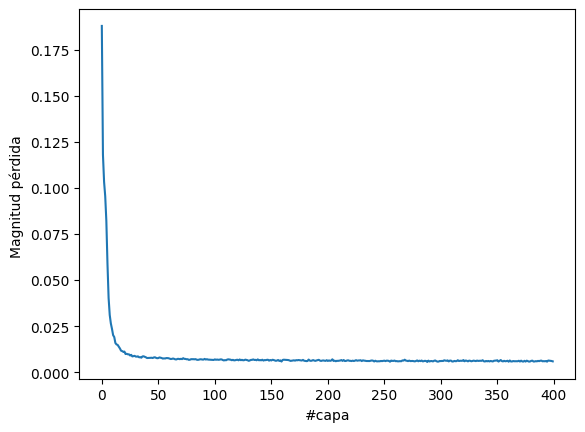

In [ ]:
import matplotlib.pyplot as plt

# Para que los gráficos se muestren dentro del notebook de Colab
%matplotlib inline

plt.xlabel("#capa")
plt.ylabel("Magnitud pérdida ")
plt.plot(historial.history["loss"])
plt.show()


# Capas y resultados del embedding

In [ ]:
# Obtener las capas de embedding
embedding_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Embedding)]

for i, layer in enumerate(embedding_layers):
    print(f"Embedding layer {i} weights:")
    print(layer.get_weights()[0])


In [ ]:
import numpy as np
import pandas as pd

# Supongamos que ya tienes los embeddings y los índices obtenidos de tu modelo
# Estos son solo ejemplos; usa los valores reales obtenidos de tu modelo

# Ejemplo de *embeddings* obtenidos para las variables categóricas
embedding_layer_fixture = embedding_layers[0].get_weights()[0]
embedding_layer_team_home = embedding_layers[1].get_weights()[0]
embedding_layer_team_away = embedding_layers[2].get_weights()[0]
embedding_layer_referee = embedding_layers[3].get_weights()[0]
embedding_layer_status_short = embedding_layers[4].get_weights()[0]
embedding_layer_season = embedding_layers[5].get_weights()[0]
embedding_layer_round = embedding_layers[6].get_weights()[0]
embedding_layer_venue = embedding_layers[7].get_weights()[0]
embedding_layer_city = embedding_layers[8].get_weights()[0]
embedding_layer_lineup_home = embedding_layers[9].get_weights()[0]
embedding_layer_lineup_away = embedding_layers[10].get_weights()[0]
embedding_layer_coach_home = embedding_layers[11].get_weights()[0]
embedding_layer_coach_away = embedding_layers[12].get_weights()[0]

# Función para obtener embeddings de cada jugador, incluyendo variables numéricas
def get_fixture_embeddings(df, embedding_layer_fixture, embedding_layer_team_home, embedding_layer_team_away,
                          embedding_layer_referee, embedding_layer_status_short, embedding_layer_season,
                          embedding_layer_round, embedding_layer_venue, embedding_layer_city,
                          embedding_layer_lineup_home, embedding_layer_lineup_away,
                          embedding_layer_coach_home, embedding_layer_coach_away):
    embeddings = []

    for _, row in df.iterrows():
        # Obtener los embeddings de las variables categóricas
        fixture_embedding = embedding_layer_fixture[row['id_fixture']]
        team_home_embedding = embedding_layer_team_home[row['team_home']]
        team_away_embedding = embedding_layer_team_away[row['team_away']]
        referee_embedding = embedding_layer_referee[row['referee']]
        status_short_embedding = embedding_layer_status_short[row['status_short']]
        season_embedding = embedding_layer_season[row['season']]
        round_embedding = embedding_layer_round[row['round']]
        venue_embedding = embedding_layer_venue[row['venue']]
        city_embedding = embedding_layer_city[row['city']]
        lineup_home_embedding = embedding_layer_lineup_home[row['lineup_home']]
        lineup_away_embedding = embedding_layer_lineup_away[row['lineup_away']]
        coach_home_embedding = embedding_layer_coach_home[row['coach_home']]
        coach_away_embedding = embedding_layer_coach_away[row['coach_away']]


        # Combinar todos los embeddings categóricos
        categorical_embedding = np.concatenate([fixture_embedding, team_home_embedding, team_away_embedding,
                                                referee_embedding, status_short_embedding, season_embedding,
                                                round_embedding, venue_embedding, city_embedding, lineup_home_embedding,
                                                lineup_away_embedding, coach_home_embedding, coach_away_embedding])
        # Añadir las características numéricas sin embeddings
        numerical_features = row[['winner_home', 'winner_away', 'goals_home', 'goals_away' ]].values

        # Combinar embeddings categóricos y características numéricas
        combined_embedding = np.concatenate([categorical_embedding, numerical_features])
        embeddings.append(combined_embedding)

    return np.array(embeddings)

# Obtener embeddings para todos los jugadores

fixture_embeddings = get_fixture_embeddings(df, embedding_layer_fixture, embedding_layer_team_home,
                                          embedding_layer_team_away, embedding_layer_referee, embedding_layer_status_short,
                                          embedding_layer_season, embedding_layer_round, embedding_layer_venue,
                                          embedding_layer_city, embedding_layer_lineup_home, embedding_layer_lineup_away,
                                          embedding_layer_coach_home, embedding_layer_coach_away)


# Imprimir los resultados
fixture_df = pd.DataFrame(fixture_embeddings, columns=[f'feature_{i}' for i in range(fixture_embeddings.shape[1])])
print(fixture_df)




     feature_0 feature_1 feature_2 feature_3 feature_4 feature_5 feature_6  \
0    -0.380849 -0.063378 -0.009769   0.09176  0.000539  0.012592 -0.084777   
1    -0.263621  0.014533   0.02288  0.098109  0.000539  0.012592 -0.084777   
2      0.18825 -0.051981 -0.009769   0.09176  0.000539  0.012592 -0.046562   
3     0.283164  0.014533  0.040533  0.098109  0.000539  0.012592 -0.046562   
4     0.057312 -0.063378 -0.035712  0.047566  0.000539  0.012592 -0.046562   
...        ...       ...       ...       ...       ...       ...       ...   
2854  0.602873 -0.051981 -0.043407  0.015346 -0.005414  0.024829  0.013331   
2855  0.184615  0.020425   0.02288  0.015346 -0.005414  0.024829  0.013331   
2856  0.148835 -0.009733 -0.020032  0.015346 -0.005414  0.024829  0.013331   
2857  0.126574  0.071716 -0.034761  0.015346 -0.005414  0.024829  0.013331   
2858  0.072017 -0.003909 -0.060462  0.015346 -0.005414  0.024829  0.013331   

     feature_7 feature_8 feature_9 feature_10 feature_11 featur

**¿Qué característica corresponde a que feature?**

In [ ]:
# Función para obtener el tamaño del embedding
def get_embedding_size(embedding_layer):
    return embedding_layer.get_weights()[0].shape[1]

# Obtener tamaños de embeddings
embedding_sizes = [get_embedding_size(layer) for layer in embedding_layers]

# Función para obtener etiquetas de características
def get_feature_labels(embedding_sizes, embedding_columns, num_features):
    feature_labels = []
    idx = 0

    # Etiquetas para embeddings categóricos
    for size, column_prefix in zip(embedding_sizes, embedding_columns):
        for j in range(size):
            feature_labels.append(f"{column_prefix}{j} - {column_prefix[:-1]}")
            idx += 1

    # Etiquetas para características numéricas
    for feature in num_features:
        feature_labels.append(f"{feature} - Numerical Feature")
        idx += 1

    return feature_labels

# Etiquetas de características
embedding_columns = [
    'fixture_', 'team_home_', 'team_away_', 'referee_', 'status_short_', 'season_',
    'round_', 'venue_', 'city_', 'lineup_home_', 'lineup_away_',
    'coach_home_', 'coach_away_'
]
num_features = ['winner_home', 'winner_away', 'goals_home', 'goals_away']

feature_labels = get_feature_labels(embedding_sizes, embedding_columns, num_features)

# Mostrar las etiquetas correspondientes a las columnas del DataFrame
print("\nEtiquetas de características:")
for i, col in enumerate(fixture_df.columns):
    print(f"{col}: {feature_labels[i]}")


Etiquetas de características:
feature_0: fixture_0 - fixture
feature_1: team_home_0 - team_home
feature_2: team_away_0 - team_away
feature_3: referee_0 - referee
feature_4: status_short_0 - status_short
feature_5: season_0 - season
feature_6: round_0 - round
feature_7: venue_0 - venue
feature_8: city_0 - city
feature_9: lineup_home_0 - lineup_home
feature_10: lineup_away_0 - lineup_away
feature_11: coach_home_0 - coach_home
feature_12: coach_away_0 - coach_away
feature_13: winner_home - Numerical Feature
feature_14: winner_away - Numerical Feature
feature_15: goals_home - Numerical Feature
feature_16: goals_away - Numerical Feature


In [ ]:
# Guardar los embeddings en un archivo .npy
np.save('fixture_embeddings.npy', fixture_embeddings)


In [ ]:
import numpy as np
import json
# Convertir el DataFrame a una lista de diccionarios
fixture_list = fixture_df.to_dict(orient='records')
# Guardar la lista en un archivo JSON
with open('fixture_embeddings.json', 'w') as json_file:
    json.dump(fixture_list, json_file)


In [ ]:
# Convertir el DataFrame a una lista de diccionarios
fixture_list = fixture_df.to_dict(orient='records')
# Guardar la lista en un archivo JSON
with open('fixture_embeddings.json', 'w') as json_file:
    json.dump(fixture_list, json_file)